In [1]:
%reload_ext autoreload
%autoreload 2

##### Define ChEMBL and Papyrus versions

In [2]:
chembl_version = '31'
papyrus_version = '05.5'
papyrus_flavor = 'nostereo'

##### Define annotation round

In [3]:
annotation_round = 2

##### Define protein for analysis

In [4]:
analysis_accession = 'P00533'

##### Define output directory

In [5]:
from mutants_in_pcm import data_path
data_path.data_dir = '../data'

In [6]:
from utils import get_mutant_analysis_path
data_dir = '1_mutant_statistics'

In [7]:
accession_analysis_dir = get_mutant_analysis_path(data_dir, 'accession', annotation_round)
common_analysis_dir = get_mutant_analysis_path(data_dir, 'common', annotation_round)
compound_analysis_dir = get_mutant_analysis_path(data_dir, 'compound', annotation_round)
bioactivity_analysis_dir = get_mutant_analysis_path(data_dir, 'bioactivity', annotation_round)

##### Import analysis functions

In [8]:
import os
import pandas as pd

In [9]:
from mutants_in_pcm.preprocessing import merge_chembl_papyrus_mutants
from mutants_in_pcm.mutant_analysis_accession import filter_accession_data
from mutants_in_pcm.mutant_analysis_common_subsets import (compute_variant_activity_distribution,
                                                           plot_bubble_bioactivity_distribution_stats,
                                                           calculate_accession_common_dataset_stats_all,
                                                           enrich_accession_common_dataset_stats)
from mutants_in_pcm.mutant_analysis_compounds import (plot_bioactivity_distribution_cluster_subset,
                                                      get_clustering_stats, butina_cluster_compounds)
from mutants_in_pcm.mutant_analysis_accession import get_statistics_across_accessions

#### Check the statistics of the different types of common subsets

For this analysis, make sure to have run beforehand /analysis/main.py script to compute common subsets for all
accessions and be able to read the statistics files.

In [10]:
# Check the status of the common subset analysis
from mutants_in_pcm.mutant_analysis_common_subsets import check_common_subset_status

check_common_subset_status(chembl_version,papyrus_version,papyrus_flavor,annotation_round,
                           common_analysis_dir,
                           common=True,
                           sim=False,
                           sim_thres=None,
                           threshold=None, # Triggers strict common subset
                           variant_coverage=None)

Checking common subset analysis status...
114 out of 335 proteins have been successfully processed.
221 out of 335 proteins have been skipped due to lack of data.
Common subset analysis is complete.


True

In [11]:
# Obtain mutant annotated bioactivity data
annotated_data = merge_chembl_papyrus_mutants(chembl_version, papyrus_version, papyrus_flavor, 1_000_000, annotation_round)

##### Check targets where a strict common subset is possible

In [12]:
# Calculate statistics per accession (full set)
stats_accessions = get_statistics_across_accessions(chembl_version, papyrus_version, papyrus_flavor, 1_000_000,
                                               annotation_round, accession_analysis_dir,save=False)
# Read/calculate statistics for strict common subset dataset
strict_subset_stats = calculate_accession_common_dataset_stats_all(common=True,
                                                                   sim=False,
                                                                   sim_thres=None,
                                                                   threshold=None, # Triggers strict common subset
                                                                   variant_coverage=None,
                                                                   output_dir=common_analysis_dir)
strict_subset_stats

,accession,undefined_mutants,n_variants,n_data,full_matrix_size,n_compounds,data_mutant_ratio,data_variant_coverage,sparsity,balance_score
0,A0A045ISB3,False,5,20,20,4,0.800000,"{'A0A045ISB3_F161S': 1.0, 'A0A045ISB3_I203A': ...",0.0,1.0
1,A4TVL0,False,2,6,6,3,0.500000,"{'A4TVL0_WT': 1.0, 'A4TVL0_Y101F': 1.0}",0.0,1.0
2,A5Z252,True,2,4,4,2,0.500000,"{'A5Z252_MUTANT': 1.0, 'A5Z252_WT': 1.0}",0.0,1.0
3,B4URF0,True,3,9,9,3,0.666667,"{'B4URF0_MUTANT': 1.0, 'B4URF0_S31A': 1.0, 'B4...",0.0,1.0
4,B7UPE2,False,2,6,6,3,1.000000,"{'B7UPE2_D516V': 1.0, 'B7UPE2_S531L': 1.0}",0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
109,Q9NUW8,False,2,16,16,8,0.500000,"{'Q9NUW8_H493R': 1.0, 'Q9NUW8_WT': 1.0}",0.0,1.0
110,Q9P2K8,False,2,14,14,7,0.500000,"{'Q9P2K8_S808G': 1.0, 'Q9P2K8_WT': 1.0}",0.0,1.0
111,Q9UDY8,False,2,8,8,4,0.500000,"{'Q9UDY8_E397A': 1.0, 'Q9UDY8_WT': 1.0}",0.0,1.0
112,Q9UM07,False,5,15,15,3,0.800000,"{'Q9UM07_Q346A': 1.0, 'Q9UM07_Q346E': 1.0, 'Q9...",0.0,1.0


In [13]:
# Enrich common subset stats with stats from the full set
strict_subset_stats_enriched = enrich_accession_common_dataset_stats(strict_subset_stats, stats_accessions)
strict_subset_stats_enriched

,accession,undefined_mutants,n_variants,n_data,full_matrix_size,n_compounds,data_mutant_ratio,data_variant_coverage,sparsity,balance_score,...,l1,l2,l3,l4,Organism,HGNC_symbol,n_data_full,data_mutant_percentage_full,common_subset_data_percentage,common_subset_variant_percentage
0,A0A045ISB3,False,5,20,20,4,0.800000,"{'A0A045ISB3_F161S': 1.0, 'A0A045ISB3_I203A': ...",0.0,1.0,...,Enzyme,Hydrolase,Other,Other,Mycobacterium tuberculosis,NaN,261,6.130268,7.662835,100.0
1,A4TVL0,False,2,6,6,3,0.500000,"{'A4TVL0_WT': 1.0, 'A4TVL0_Y101F': 1.0}",0.0,1.0,...,Other,Other,Other,Other,Magnetospirillum gryphiswaldense,NaN,25,12.000000,24.000000,100.0
2,A5Z252,True,2,4,4,2,0.500000,"{'A5Z252_MUTANT': 1.0, 'A5Z252_WT': 1.0}",0.0,1.0,...,Enzyme,Hydrolase,Other,Other,Influenza A virus (A/Turkey/651242/2006(H5N1)),NaN,62,17.741935,6.451613,100.0
3,B4URF0,True,3,9,9,3,0.666667,"{'B4URF0_MUTANT': 1.0, 'B4URF0_S31A': 1.0, 'B4...",0.0,1.0,...,Enzyme,Hydrolase,Other,Other,Influenza A virus (strain A/Wilson-Smith/1933 ...,NaN,595,7.058824,1.512605,100.0
4,B7UPE2,False,2,6,6,3,1.000000,"{'B7UPE2_D516V': 1.0, 'B7UPE2_S531L': 1.0}",0.0,1.0,...,Enzyme,Transferase,Other,Other,Escherichia coli O127:H6 (strain E2348/69 / EPEC),NaN,7,100.000000,85.714286,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Q9NUW8,False,2,16,16,8,0.500000,"{'Q9NUW8_H493R': 1.0, 'Q9NUW8_WT': 1.0}",0.0,1.0,...,Enzyme,Phosphodiesterase,Other,Other,Homo sapiens (Human),TDP1,6666,0.120012,0.240024,100.0
110,Q9P2K8,False,2,14,14,7,0.500000,"{'Q9P2K8_S808G': 1.0, 'Q9P2K8_WT': 1.0}",0.0,1.0,...,Enzyme,Kinase,Protein Kinase,Other protein kinase group,Homo sapiens (Human),EIF2AK4,94,60.638298,14.893617,100.0
111,Q9UDY8,False,2,8,8,4,0.500000,"{'Q9UDY8_E397A': 1.0, 'Q9UDY8_WT': 1.0}",0.0,1.0,...,Enzyme,Hydrolase,Other,Other,Homo sapiens (Human),NaN,195,2.051282,4.102564,100.0
112,Q9UM07,False,5,15,15,3,0.800000,"{'Q9UM07_Q346A': 1.0, 'Q9UM07_Q346E': 1.0, 'Q9...",0.0,1.0,...,Enzyme,Other,Other,Other,Homo sapiens (Human),PADI4,57,26.315789,26.315789,100.0


In [14]:
# Check how many proteins had a common subset and the distribution of the size of common subsets
strict_subset_stats_enriched[['n_variants','n_data','n_compounds','common_subset_data_percentage', 
                 'common_subset_variant_percentage']].describe()

,n_variants,n_data,n_compounds,common_subset_data_percentage,common_subset_variant_percentage
count,114.000000,114.000000,114.000000,114.000000,114.0
mean,3.728070,27.719298,9.842105,13.775219,100.0
std,6.829511,74.089817,33.136505,22.481596,0.0
min,2.000000,4.000000,2.000000,0.019944,100.0
25%,2.000000,6.000000,2.000000,0.791126,100.0
50%,2.000000,12.000000,3.500000,2.923789,100.0
75%,3.750000,20.000000,7.000000,15.771597,100.0
max,71.000000,692.000000,346.000000,100.000000,100.0


##### Compounds tested on at least 2 variants. Variant coverage of 20%

In [15]:
# Read/calculate statistics for strict common subset dataset
common_subset_20_stats = calculate_accession_common_dataset_stats_all(common=True,
                                                                   sim=False,
                                                                   sim_thres=None,
                                                                   threshold=2, # Tested on at least 2 variants
                                                                   variant_coverage=0.2, # Tested on at least 2 variants
                                                                   output_dir=common_analysis_dir)

# Enrich common subset stats with stats from the full set
common_subset_20_stats_enriched = enrich_accession_common_dataset_stats(common_subset_20_stats, stats_accessions)
common_subset_20_stats_enriched

,accession,undefined_mutants,n_variants,n_data,full_matrix_size,n_compounds,data_mutant_ratio,data_variant_coverage,sparsity,balance_score,...,l1,l2,l3,l4,Organism,HGNC_symbol,n_data_full,data_mutant_percentage_full,common_subset_data_percentage,common_subset_variant_percentage
0,A0A045ISB3,False,5,20,20,4,0.800000,"{'A0A045ISB3_F161S': 1.0, 'A0A045ISB3_I203A': ...",0.000000,1.000000,...,Enzyme,Hydrolase,Other,Other,Mycobacterium tuberculosis,NaN,261,6.130268,7.662835,100.000000
1,A3EZI9,False,3,76,90,30,0.644737,"{'A3EZI9_D168A': 0.8, 'A3EZI9_R155K': 0.833333...",0.155556,0.844444,...,Enzyme,Protease,Serine protease,Serine protease PA clan,Hepacivirus C,NaN,794,15.239295,9.571788,42.857143
2,A3EZJ3,False,17,43,136,8,0.860465,"{'A3EZJ3_A156S': 0.25, 'A3EZJ3_A156T': 0.25, '...",0.683824,0.316176,...,Other,Other,Other,Other,Hepacivirus C,NaN,783,4.725415,5.491699,100.000000
3,A4TVL0,False,2,6,6,3,0.500000,"{'A4TVL0_WT': 1.0, 'A4TVL0_Y101F': 1.0}",0.000000,1.000000,...,Other,Other,Other,Other,Magnetospirillum gryphiswaldense,NaN,25,12.000000,24.000000,100.000000
4,A5Z252,True,2,4,4,2,0.500000,"{'A5Z252_MUTANT': 1.0, 'A5Z252_WT': 1.0}",0.000000,1.000000,...,Enzyme,Hydrolase,Other,Other,Influenza A virus (A/Turkey/651242/2006(H5N1)),NaN,62,17.741935,6.451613,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Q9UM07,False,5,19,20,4,0.789474,"{'Q9UM07_Q346A': 1.0, 'Q9UM07_Q346E': 1.0, 'Q9...",0.050000,0.950000,...,Enzyme,Other,Other,Other,Homo sapiens (Human),PADI4,57,26.315789,33.333333,100.000000
225,Q9UM73,False,3,772,1071,357,0.537565,"{'Q9UM73_G1202R': 0.22408963585434175, 'Q9UM73...",0.279178,0.720822,...,Enzyme,Kinase,Protein Kinase,TKL protein kinase group,Homo sapiens (Human),ALK,2598,24.942263,29.715166,25.000000
226,Q9WKE8,False,6,111,132,22,1.000000,"{'Q9WKE8_E138K': 1.0, 'Q9WKE8_K103N': 1.0, 'Q9...",0.159091,0.840909,...,Enzyme,Other,Other,Other,Human immunodeficiency virus 1,NaN,111,100.000000,100.000000,100.000000
227,Q9Y5X5,False,7,18,35,5,0.722222,"{'Q9Y5X5_D400A': 0.4, 'Q9Y5X5_E310A': 0.2, 'Q9...",0.485714,0.514286,...,Membrane receptor,GPCR,Peptide receptor (family A GPCR),Short peptide receptor (family A GPCR),Homo sapiens (Human),NPFFR2,129,10.077519,13.953488,100.000000


In [16]:
# Check how many proteins had a common subset and the distribution of the size of common subsets
common_subset_20_stats_enriched[['n_variants','n_data','n_compounds','common_subset_data_percentage', 
                 'common_subset_variant_percentage']].describe()

,n_variants,n_data,n_compounds,common_subset_data_percentage,common_subset_variant_percentage
count,229.000000,229.000000,229.000000,229.000000,229.000000
mean,4.751092,88.659389,35.458515,15.046627,85.975085
std,6.340075,280.394548,120.940555,23.293756,23.504859
min,2.000000,4.000000,2.000000,0.019944,10.638298
25%,2.000000,9.000000,3.000000,1.201602,75.000000
50%,3.000000,18.000000,6.000000,4.186047,100.000000
75%,5.000000,50.000000,16.000000,17.957746,100.000000
max,71.000000,2846.000000,1219.000000,100.000000,100.000000


##### Compounds tested on at least 2 variants. Variant coverage of 20% (including similarity threshold of 80%)

In [17]:
# Read/calculate statistics for strict common subset dataset
common_subset_2080_stats = calculate_accession_common_dataset_stats_all(common=True,
                                                                   sim=True,
                                                                   sim_thres=0.8,
                                                                   threshold=2, # Tested on at least 2 variants
                                                                   variant_coverage=0.2, # Tested on at least 2 variants
                                                                   output_dir=common_analysis_dir)

# Enrich common subset stats with stats from the full set
common_subset_2080_stats_enriched = enrich_accession_common_dataset_stats(common_subset_2080_stats, stats_accessions)
common_subset_2080_stats_enriched

,accession,undefined_mutants,n_variants,n_data,full_matrix_size,n_compounds,data_mutant_ratio,data_variant_coverage,sparsity,balance_score,...,l1,l2,l3,l4,Organism,HGNC_symbol,n_data_full,data_mutant_percentage_full,common_subset_data_percentage,common_subset_variant_percentage
0,A0A045ISB3,False,5,20,20,4,0.800000,"{'A0A045ISB3_F161S': 1.0, 'A0A045ISB3_I203A': ...",0.000000,1.000000,...,Enzyme,Hydrolase,Other,Other,Mycobacterium tuberculosis,NaN,261,6.130268,7.662835,100.000000
1,A3EZI9,False,3,77,84,28,0.636364,"{'A3EZI9_D168A': 0.8571428571428571, 'A3EZI9_W...",0.083333,0.916667,...,Enzyme,Protease,Serine protease,Serine protease PA clan,Hepacivirus C,NaN,794,15.239295,9.697733,42.857143
2,A3EZJ3,False,17,43,136,8,0.860465,"{'A3EZJ3_K136M': 0.375, 'A3EZJ3_K136R': 0.375,...",0.683824,0.316176,...,Other,Other,Other,Other,Hepacivirus C,NaN,783,4.725415,5.491699,100.000000
3,A4TVL0,False,2,6,6,3,0.500000,"{'A4TVL0_WT': 1.0, 'A4TVL0_Y101F': 1.0}",0.000000,1.000000,...,Other,Other,Other,Other,Magnetospirillum gryphiswaldense,NaN,25,12.000000,24.000000,100.000000
4,A5Z252,True,2,4,4,2,0.500000,"{'A5Z252_MUTANT': 1.0, 'A5Z252_WT': 1.0}",0.000000,1.000000,...,Enzyme,Hydrolase,Other,Other,Influenza A virus (A/Turkey/651242/2006(H5N1)),NaN,62,17.741935,6.451613,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,Q9UM07,False,5,20,25,5,0.750000,"{'Q9UM07_WT': 1.0, 'Q9UM07_Q346A': 0.8, 'Q9UM0...",0.200000,0.800000,...,Enzyme,Other,Other,Other,Homo sapiens (Human),PADI4,57,26.315789,35.087719,100.000000
229,Q9UM73,False,3,772,1071,357,0.537565,"{'Q9UM73_L1196M': 0.938375350140056, 'Q9UM73_W...",0.279178,0.720822,...,Enzyme,Kinase,Protein Kinase,TKL protein kinase group,Homo sapiens (Human),ALK,2598,24.942263,29.715166,25.000000
230,Q9WKE8,False,6,111,132,22,1.000000,"{'Q9WKE8_E138K': 1.0, 'Q9WKE8_K103N': 1.0, 'Q9...",0.159091,0.840909,...,Enzyme,Other,Other,Other,Human immunodeficiency virus 1,NaN,111,100.000000,100.000000,100.000000
231,Q9Y5X5,False,7,18,35,5,0.722222,"{'Q9Y5X5_D400A': 0.4, 'Q9Y5X5_E310A': 0.2, 'Q9...",0.485714,0.514286,...,Membrane receptor,GPCR,Peptide receptor (family A GPCR),Short peptide receptor (family A GPCR),Homo sapiens (Human),NPFFR2,129,10.077519,13.953488,100.000000


In [18]:
# Check how many proteins had a common subset and the distribution of the size of common subsets
common_subset_2080_stats_enriched[['n_variants','n_data','n_compounds','common_subset_data_percentage', 
                 'common_subset_variant_percentage']].describe()

,n_variants,n_data,n_compounds,common_subset_data_percentage,common_subset_variant_percentage
count,233.000000,233.000000,233.000000,233.000000,233.000000
mean,4.605150,87.356223,35.107296,14.889347,86.193024
std,5.884548,278.365096,120.050785,23.187689,23.465707
min,2.000000,3.000000,2.000000,0.019944,10.638298
25%,2.000000,8.000000,3.000000,1.204819,75.000000
50%,3.000000,18.000000,6.000000,4.120879,100.000000
75%,5.000000,49.000000,15.000000,17.500000,100.000000
max,71.000000,2848.000000,1220.000000,100.000000,100.000000


#### Plot bioactivity distribution for common subsets for target of interest

##### Strictly common subset (if possible)

In [19]:
compute_variant_activity_distribution(annotated_data, analysis_accession, common=True, sim=False, sim_thres=None,
                                      threshold=None, variant_coverage=None, plot=True, hist=False, plot_mean=True,
                                      color_palette=None, save_dataset=True,output_dir=common_analysis_dir,
                                      replot=True)

Skipping accession P00533: not enough data for plotting.


##### All datapoints

P00533 done.


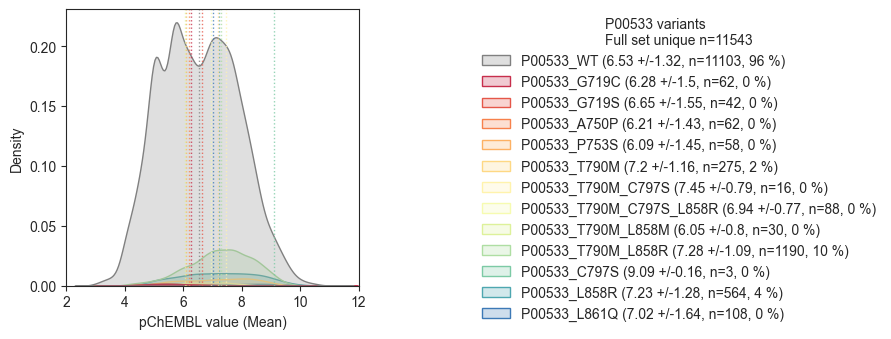

In [20]:
compute_variant_activity_distribution(annotated_data, analysis_accession, common=False, sim=False, sim_thres=None,
                                      threshold=None, variant_coverage=None, plot=True, hist=False, plot_mean=True,
                                      color_palette=None, save_dataset=True,output_dir=common_analysis_dir,
                                      replot=True)

##### Compounds tested on at least 2 variants

P00533 done.


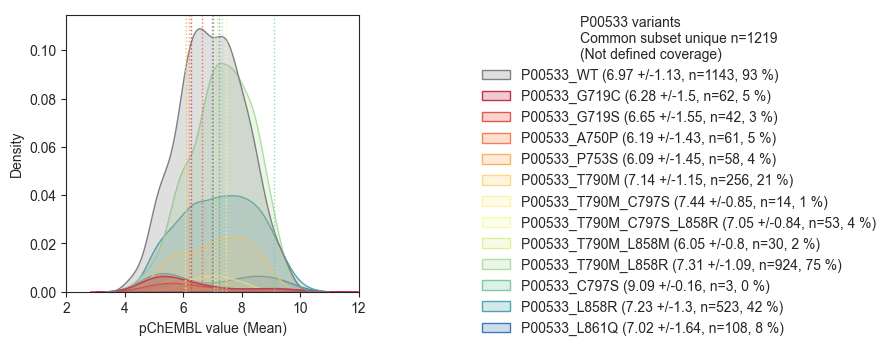

In [21]:
compute_variant_activity_distribution(annotated_data, analysis_accession, common=True, sim=False, sim_thres=None,
                                      threshold=2, variant_coverage=None, plot=True, hist=False,
                                      plot_mean=True, color_palette=None,
                                      save_dataset=True,output_dir=common_analysis_dir,
                                      replot=True)

##### Compounds tested on at least 2 variants. Variant coverage of 1%

P00533 done.


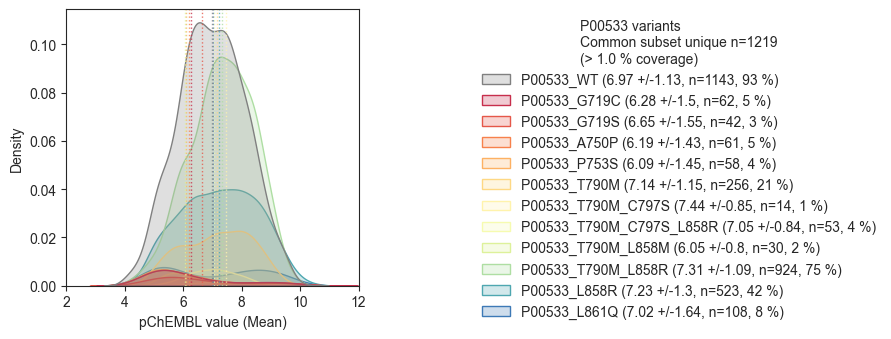

In [22]:
compute_variant_activity_distribution(annotated_data, analysis_accession, common=True, sim=False, sim_thres=None,
                                      threshold=2, variant_coverage=0.01, plot=True, hist=False,
                                      plot_mean=True, color_palette=None,
                                      save_dataset=True,output_dir=common_analysis_dir,
                                      replot=True)

##### Compounds tested on at least 2 variants. Variant coverage of 20%

P00533 done.


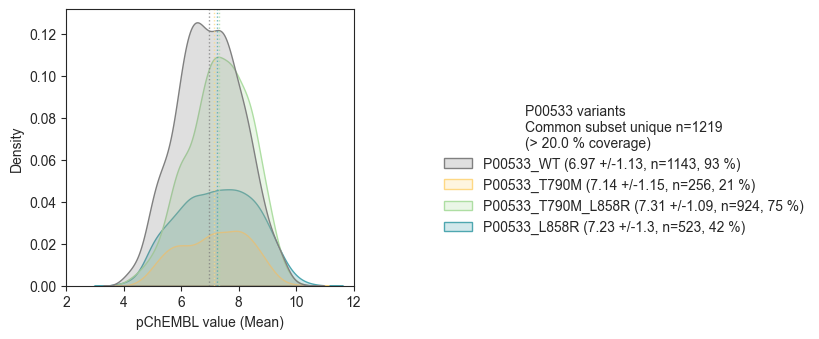

In [23]:
compute_variant_activity_distribution(annotated_data, analysis_accession, common=True, sim=False, sim_thres=None,
                                      threshold=2, variant_coverage=0.2, plot=True, hist=False,
                                      plot_mean=True, color_palette=None,
                                      save_dataset=True,output_dir=common_analysis_dir,
                                      replot=True)

##### Compounds tested on at least 2 variants. Variant coverage of 20% (including similarity threshold of 80%)

P00533 done.


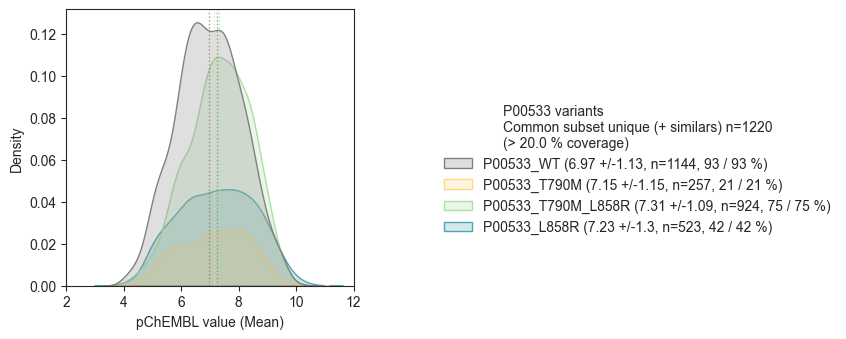

In [24]:
compute_variant_activity_distribution(annotated_data, analysis_accession, common=True, sim=True, sim_thres=0.8,
                                      threshold=2, variant_coverage=0.2, plot=True, hist=False,
                                      plot_mean=True,color_palette=None,
                                      save_dataset=True,output_dir=common_analysis_dir,
                                      replot=True)

##### Plot bioactivity distribution summary across different types of subsets

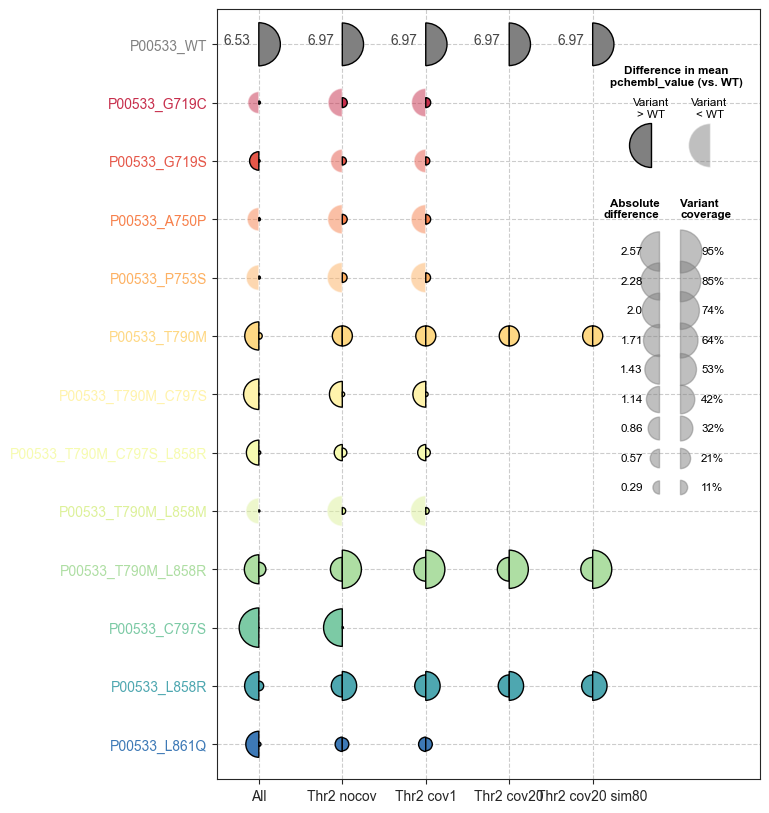

In [25]:
plot_bubble_bioactivity_distribution_stats(common_analysis_dir, 'common_subsets', analysis_accession, 'mean_error',
                                           bioactivity_analysis_dir)

#### Plot bioactivity distribution for top 10 Butina clusters

Loaded 1219 clusters for P00533
P00533 done.
P00533 done.
P00533 done.
P00533 done.
P00533 done.
P00533 done.
P00533 done.
P00533 done.
P00533 done.
P00533 done.


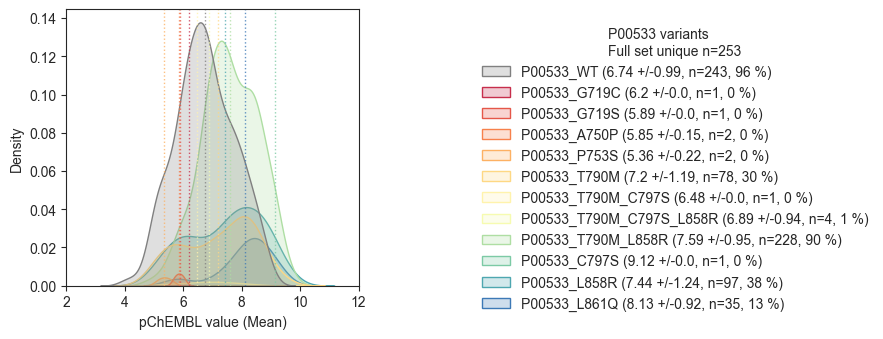

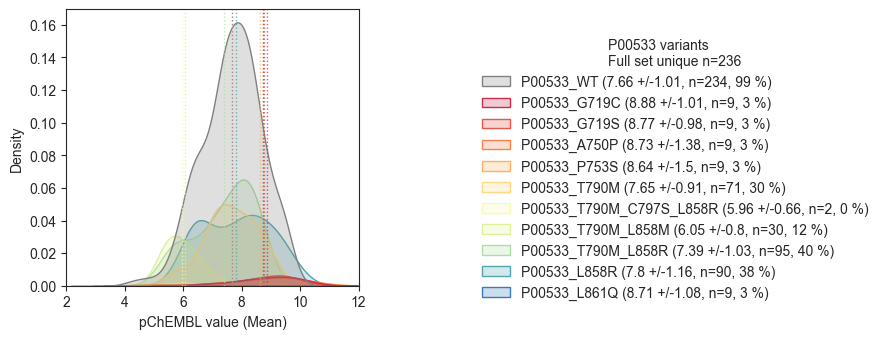

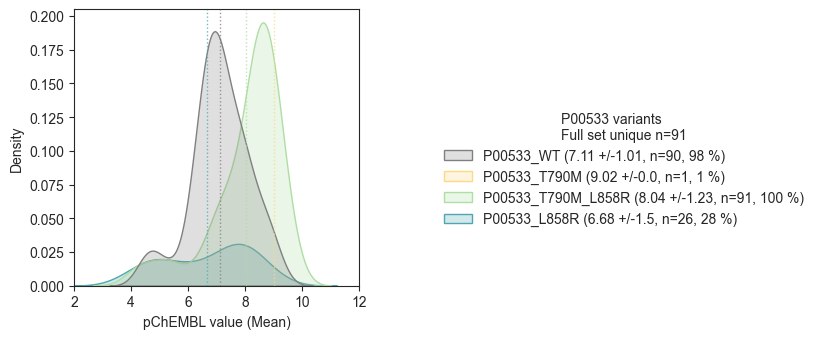

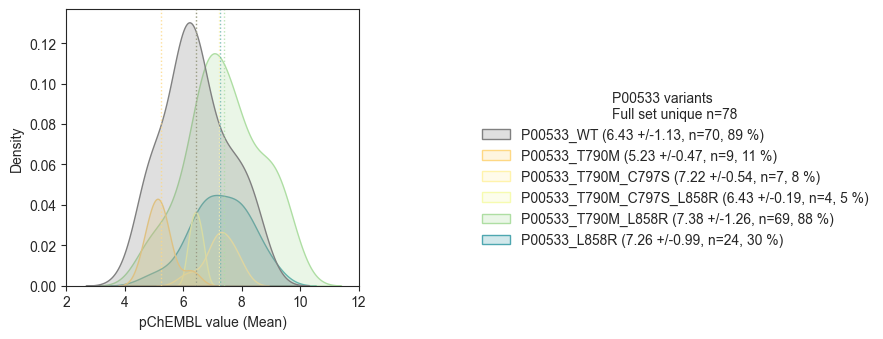

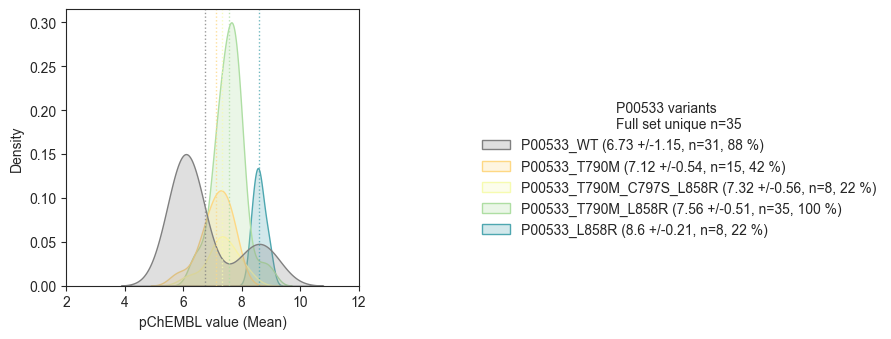

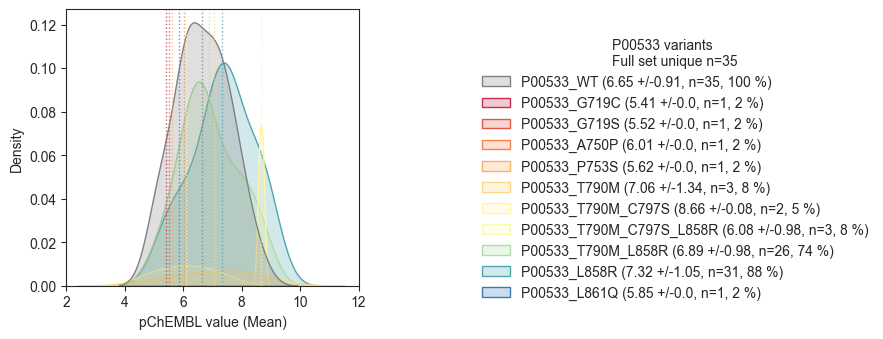

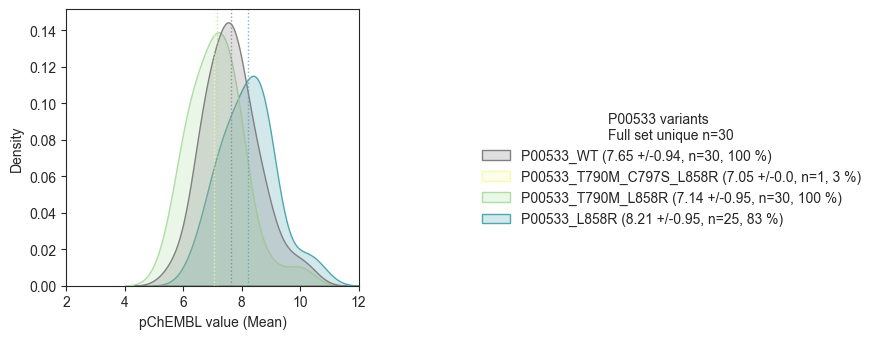

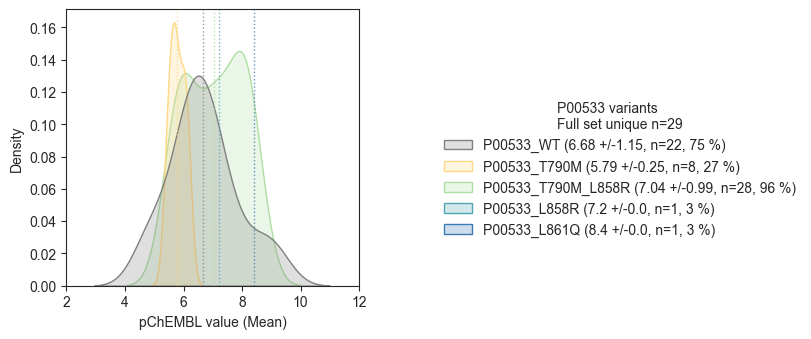

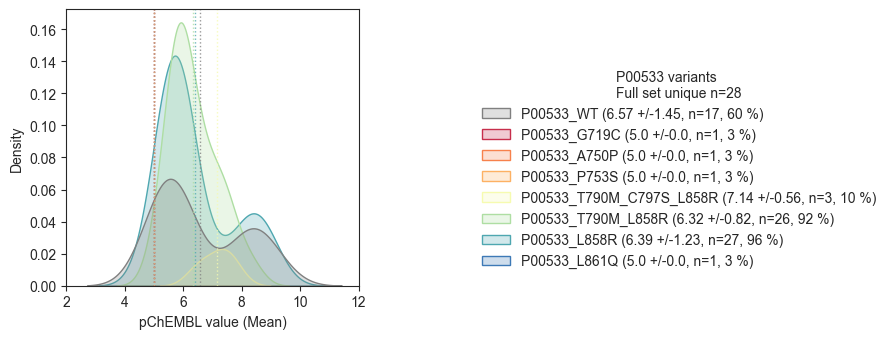

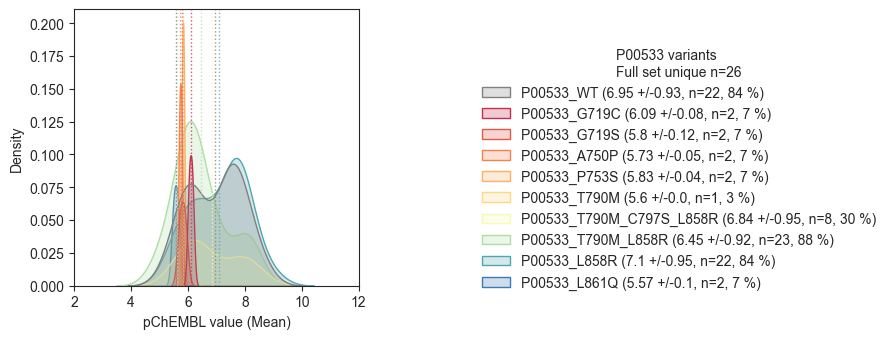

In [26]:
plot_bioactivity_distribution_cluster_subset(analysis_accession, annotation_round, compound_analysis_dir, 
                                             min_common=True, replot=True)

In [27]:
get_clustering_stats(analysis_accession, compound_analysis_dir, 'full_dual_tested_set', '0.5')

Number of clusters: 118
Number of compounds in clusters: 1219
Number of compounds per cluster:
Cluster 1: 253 compounds
Cluster 2: 236 compounds
Cluster 3: 91 compounds
Cluster 4: 78 compounds
Cluster 5: 35 compounds
Cluster 6: 35 compounds
Cluster 7: 30 compounds
Cluster 8: 29 compounds
Cluster 9: 28 compounds
Cluster 10: 26 compounds
Cluster 11: 24 compounds
Cluster 12: 23 compounds
Cluster 13: 20 compounds
Cluster 14: 20 compounds
Cluster 15: 19 compounds
Cluster 16: 19 compounds
Cluster 17: 16 compounds
Cluster 18: 13 compounds
Cluster 19: 12 compounds
Cluster 20: 12 compounds
Cluster 21: 11 compounds
Cluster 22: 10 compounds
Cluster 23: 7 compounds
Cluster 24: 6 compounds
Cluster 25: 6 compounds
Cluster 26: 5 compounds
Cluster 27: 5 compounds
Cluster 28: 5 compounds
Cluster 29: 5 compounds
Cluster 30: 4 compounds
Cluster 31: 4 compounds
Cluster 32: 4 compounds
Cluster 33: 4 compounds
Cluster 34: 4 compounds
Cluster 35: 4 compounds
Cluster 36: 4 compounds
Cluster 37: 4 compounds
Cl

{'AAKJLRGGTJKAMG': 2,
 'BCFGMOOMADDAQU': 46,
 'BIIVYFLTOXDAOV': 118,
 'BMGQWWVMWDBQGC': 37,
 'BTIHMVBBUGXLCJ': 16,
 'CDMGBJANTYXAIV': 10,
 'CTNPALGJUAXMMC': 56,
 'CUIHSIWYWATEQL': 117,
 'CVWXJKQAOSCOAB': 116,
 'CXQHYVUVSFXTMY': 21,
 'CYOHGALHFOKKQC': 115,
 'DKNUPRMJNUQNHR': 114,
 'FHYUGAJXYORMHI': 47,
 'GCIKSSRWRFVXBI': 9,
 'GUBJNPWVIUFSTR': 57,
 'HHFBDROWDBDFBR': 113,
 'HKSZLNNOFSGOKW': 37,
 'HZTYDQRUAWIZRE': 1,
 'JOOXLOJCABQBSG': 81,
 'JRNJNYBQQYBCLE': 112,
 'JWNPDZNEKVCWMY': 2,
 'KDKUVYLMPJIGKA': 111,
 'KTUFNOKKBVMGRW': 27,
 'LLVZBTWPGQVVLW': 65,
 'MFAQYJIYDMLAIM': 6,
 'MLDQJTXFUGDVEO': 110,
 'MPVGZUGXCQEXTM': 109,
 'MVCOAUNKQVWQHZ': 108,
 'MVPKLZHNOLVZAU': 57,
 'MYQAUKPBNJWPIE': 107,
 'NHHQJBCNYHBUSI': 80,
 'ODPGGGTTYSGTGO': 23,
 'OMZCMEYTWSXEPZ': 2,
 'OUSFTKFNBAZUKL': 106,
 'PIQCTGMSNWUMAF': 105,
 'QCVAULIYZATFDX': 2,
 'QHKYPYXTTXKZST': 10,
 'QQWUGDVOUVUTOY': 45,
 'QYZOGCMHVIGURT': 2,
 'RAHBGWKEPAQNFF': 70,
 'TUVCWJQQGGETHL': 104,
 'UBPYILGKFZZVDX': 13,
 'UHTHHESEBZOYNR': 2,
 'UIA

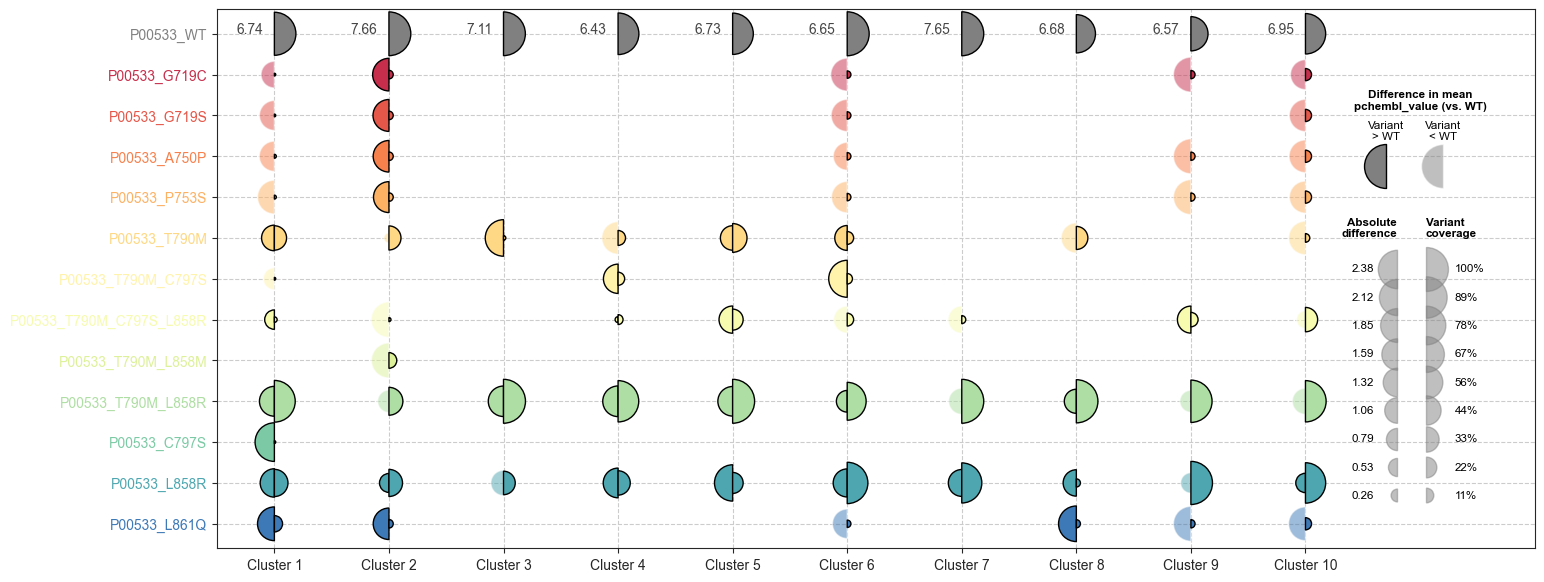

In [28]:
plot_bubble_bioactivity_distribution_stats(compound_analysis_dir,
                                           'butina_clusters_dual',
                                           analysis_accession, 'mean_error',bioactivity_analysis_dir)